<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/week2_projet_dailychallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daily Challenge: Interactive Data Visualization with Matplotlib and Seaborn


👩‍🏫 👩🏿‍🏫 What You’ll learn
Advanced data visualization techniques.
Interactive chart creation using Matplotlib.
Elegant static data presentation with Seaborn.


Your Task


1. Data Preparation:
Download and explore the US Superstore data.
Perform basic data cleaning and preprocessing.


2. Data Visualization with Matplotlib:
Create an interactive line chart to show sales trends over the years.
Build an interactive map to visualize sales distribution by country.


3. Data Visualization with Seaborn:
Use Seaborn to generate a bar chart showing top 10 products by sales.
Create a scatter plot to analyze the relationship between profit and discount.


4. Comparative Analysis:
Compare the insights gained from Matplotlib and Seaborn visualizations.
Document your observations about the ease of use and effectiveness of both tools.


5. Code and Insights:
Write clear, well-documented Python code.
Include your analysis and insights as comments or markdown cells in your Jupyter notebook.


In [ ]:

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (11,5)
plt.rcParams['axes.grid'] = True


!pip -q install ipywidgets geopandas
import ipywidgets as widgets
from ipywidgets import interact, Dropdown
import warnings; warnings.filterwarnings('ignore')

import os, glob, pandas as pd

def smart_read(path):
    ext = path.split('.')[-1].lower()
    if ext == 'csv':
        try:
            return pd.read_csv(path, sep=None, engine="python", encoding="utf-8-sig")
        except UnicodeDecodeError:
            return pd.read_csv(path, sep=None, engine="python", encoding="latin-1")
    elif ext in ('xls','xlsx'):
        return pd.read_excel(path)
    else:
        raise ValueError("Unsupported file type. Use CSV/XLS/XLSX.")

print("Files in /content:", os.listdir("/content"))

cands = glob.glob("/content/*Superstore*.*")
print("Candidates:", cands)

if not cands:
  from google.colab import files
    uploaded = files.upload()          # alege "US Superstore data.xls"
    FILE = list(uploaded.keys())[0]    # numele real încărcat
else:
    FILE = cands[0]                    # ia primul candidat găsit

print("Using file:", FILE)
df = smart_read(FILE)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist()[:12])
df.head()





IndentationError: unexpected indent (ipython-input-3441110969.py, line 34)

In [ ]:

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (11,5)
plt.rcParams['axes.grid'] = True

!pip -q install xlrd openpyxl

import os, glob
import pandas as pd

def smart_read(path):
    ext = path.split('.')[-1].lower()
    if ext == 'csv':
        for enc in ('utf-8-sig','latin-1','cp1252'):
            try:
                return pd.read_csv(path, sep=None, engine="python", encoding=enc)
            except UnicodeDecodeError:
                continue
        return pd.read_csv(path, sep=None, engine="python", encoding='latin-1', on_bad_lines='skip')
    elif ext in ('xls','xlsx'):
        return pd.read_excel(path)
    else:
        raise ValueError("Unsupported file type. Use CSV/XLS/XLSX.")

# 1) vezi fișierele din /content
print("Files in /content:", os.listdir("/content"))

# 2) caută fișiere care conțin "Superstore"
cands = glob.glob("/content/*Superstore*.*")
print("Candidates:", cands)

if not cands:
    # dacă nu găsim nimic, cerem upload
    from google.colab import files
    uploaded = files.upload()  # ← aici nu trebuie spațiu înainte
    FILE = list(uploaded.keys())[0]
else:
    FILE = cands[0]  # ia primul fișier găsit

print("Using file:", FILE)
df = smart_read(FILE)

# curățare rapidă
df.columns = df.columns.str.replace('\xa0',' ', regex=False).str.strip()
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.replace('\xa0',' ', regex=False).str.strip()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist()[:12])
df.head()







Files in /content: ['.config', 'sample_data']
Candidates: []


Saving US Superstore data.xls to US Superstore data.xls
Using file: US Superstore data.xls
Shape: (9994, 21)
Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# --- FIX COLUMN NAMES + CREATE TIME FEATURES ---

def pick(cols, candidates):
    for c in candidates:
        if c in cols:
            return c
    return None


orig_cols = df.columns.tolist()

order_date_col = pick(df.columns, ['Order Date','Order_Date','OrderDate','Order date'])
sales_col      = pick(df.columns, ['Sales','Sales ','Sale','Sales Amount','Sales ($)'])
category_col   = pick(df.columns, ['Category','Product Category','Prod Category','Cat'])

rename_map = {}
if order_date_col and order_date_col != 'Order Date': rename_map[order_date_col] = 'Order Date'
if sales_col and sales_col != 'Sales':               rename_map[sales_col]      = 'Sales'
if category_col and category_col != 'Category':      rename_map[category_col]   = 'Category'
if rename_map:
    df = df.rename(columns=rename_map)


if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
    df['Order Year'] = df['Order Date'].dt.year
    df['Order YM']   = df['Order Date'].dt.to_period('M')


if 'Sales' in df.columns:
    df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

print("Columns now:", df.columns.tolist())
print("Has Order YM:", 'Order YM' in df.columns, "| Has Sales:", 'Sales' in df.columns)

# --- REDEFINE interactive plot with fallback (uses YM if exists, else Year) ---
from ipywidgets import interact, Dropdown
import matplotlib.pyplot as plt

def plot_trend(category='All'):
    plt.figure(figsize=(12,5))

    if 'Order YM' in df.columns and df['Order YM'].notna().any():
        if category=='All' or 'Category' not in df.columns:
            monthly = df.groupby('Order YM')['Sales'].sum().sort_index()
            plt.plot(monthly.index.to_timestamp(), monthly.values, marker='o')
            title = "Monthly Sales – All"
        else:
            mcat = (df.groupby(['Order YM','Category'])['Sales']
                      .sum().reset_index())
            mcat['Date'] = mcat['Order YM'].dt.to_timestamp()
            cur = mcat[mcat['Category']==category]
            plt.plot(cur['Date'], cur['Sales'], marker='o')
            title = f"Monthly Sales – {category}"
        plt.xlabel("Date")
    else:

        yearly = df.groupby('Order Year')['Sales'].sum().sort_index()
        if category!='All' and 'Category' in df.columns:
            ycat = (df.groupby(['Order Year','Category'])['Sales']
                      .sum().reset_index())
            cur = ycat[ycat['Category']==category]
            plt.plot(cur['Order Year'], cur['Sales'], marker='o')
            title = f"Yearly Sales – {category}"
        else:
            plt.plot(yearly.index, yearly.values, marker='o')
            title = "Yearly Sales – All"
        plt.xlabel("Year")

    plt.title(title)
    plt.ylabel("Sales ($)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

cats = ['All'] + (sorted(df['Category'].dropna().unique()) if 'Category' in df.columns else [])
interact(plot_trend, category=Dropdown(options=cats, value='All', description='Category:'))


assert {'Order YM','Sales'}.issubset(df.columns), "Lipsește 'Order Date' / 'Order YM' sau 'Sales'."
monthly = df.groupby('Order YM')['Sales'].sum().sort_index()
x = monthly.index.to_timestamp(); y = monthly.values

def plot_trend(category='All'):
    plt.figure(figsize=(12,5))
    if category=='All' or 'Category' not in df.columns:
        plt.plot(x, y, marker='o'); title = "Monthly Sales – All"
    else:
        mcat = (df.groupby(['Order YM','Category'])['Sales']
                  .sum().reset_index())
        mcat['Date'] = mcat['Order YM'].dt.to_timestamp()
        cur = mcat[mcat['Category']==category]
        plt.plot(cur['Date'], cur['Sales'], marker='o'); title = f"Monthly Sales – {category}"
    plt.title(title); plt.xlabel("Date"); plt.ylabel("Sales ($)")
    plt.xticks(rotation=45); plt.tight_layout(); plt.show()

cats = ['All'] + (sorted(df['Category'].dropna().unique()) if 'Category' in df.columns else [])
interact(plot_trend, category=Dropdown(options=cats, value='All', description='Category:'))


Columns now: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order YM']
Has Order YM: True | Has Sales: True


interactive(children=(Dropdown(description='Category:', options=('All', 'Furniture', 'Office Supplies', 'Techn…

interactive(children=(Dropdown(description='Category:', options=('All', 'Furniture', 'Office Supplies', 'Techn…

<function __main__.plot_trend(category='All')>

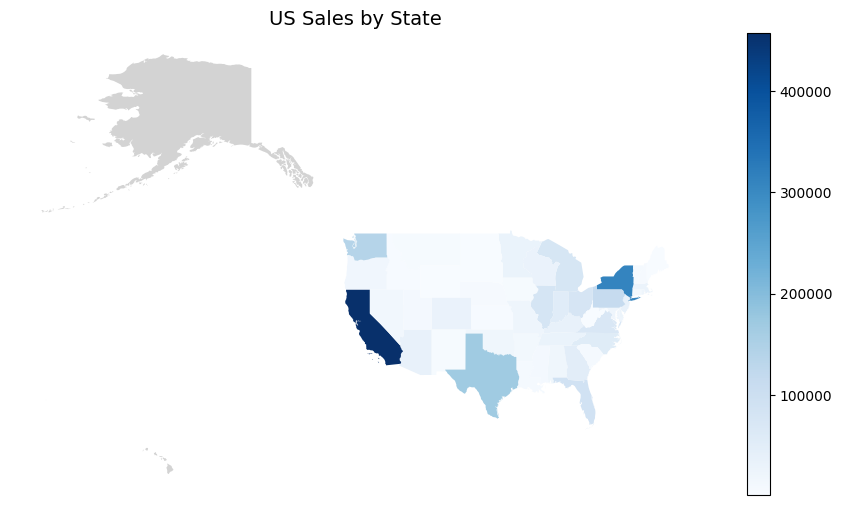

In [ ]:
# US choropleth: Sales by State
!pip -q install geopandas pyogrio

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

needed = {'State','Sales'}
if needed.issubset(df.columns):

    state_sales = (df.groupby('State')['Sales']
                   .sum()
                   .rename('Sales')
                   .reset_index())


    admin1 = gpd.read_file(
        'zip+https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces.zip'
    )

    admin1_us = admin1[admin1['admin'].isin(['United States of America','United States'])].copy()


    name_col = 'name' if 'name' in admin1_us.columns else 'name_en'


    admin1_us['__key'] = admin1_us[name_col].str.strip().str.lower()
    state_sales['__key'] = state_sales['State'].str.strip().str.lower()

    us_merged = admin1_us.merge(state_sales[['__key','Sales']], on='__key', how='left')

    ax = us_merged.plot(
        column='Sales',
        figsize=(12, 6),
        cmap='Blues',
        legend=True,
        missing_kwds={'color':'lightgrey','label':'No data'}
    )
    ax.set_title("US Sales by State", fontsize=14)
    ax.set_axis_off()
    plt.show()
else:
    print("Pentru harta pe state ai nevoie de coloanele 'State' și 'Sales'.")


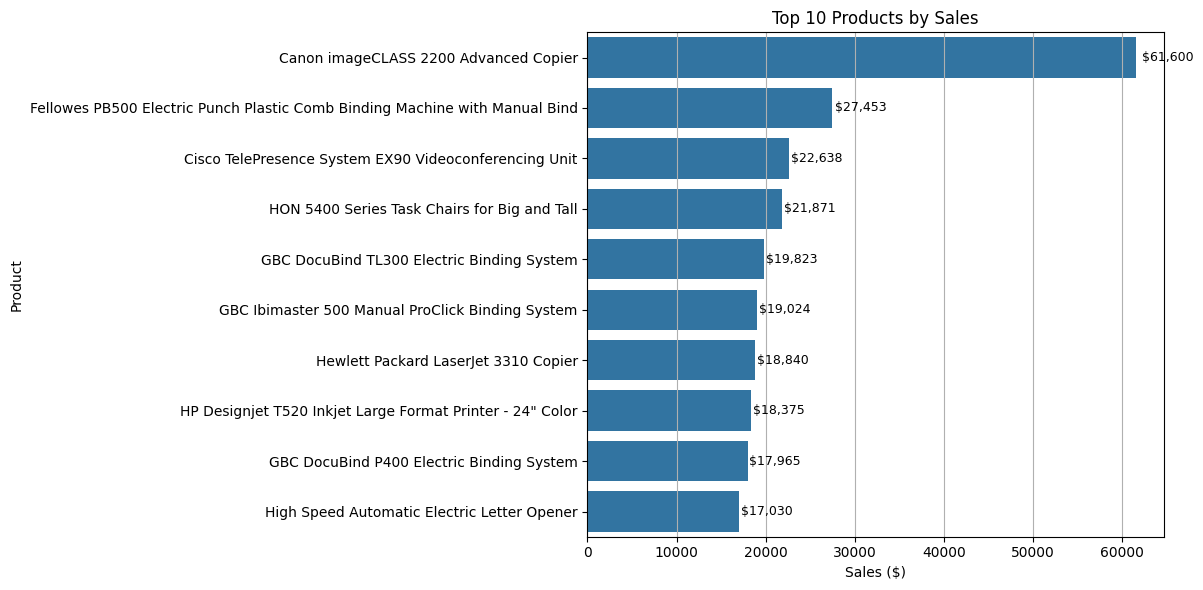

In [ ]:
assert {'Product Name','Sales'}.issubset(df.columns), "Ai nevoie de Product Name + Sales."
top_prod = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_prod.values, y=top_prod.index, orient='h')
plt.title("Top 10 Products by Sales"); plt.xlabel("Sales ($)"); plt.ylabel("Product")
for i,(name,val) in enumerate(top_prod.items()):
    ax.text(val*1.01, i, f"${val:,.0f}", va='center', fontsize=9)
plt.tight_layout(); plt.show()


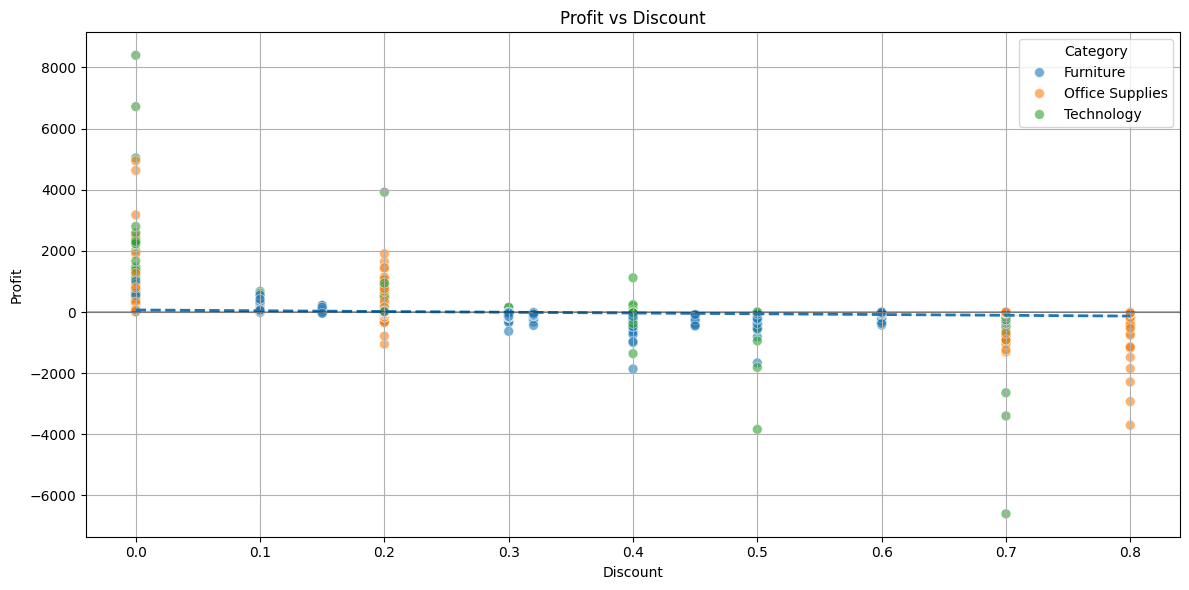

In [ ]:
assert {'Discount','Profit'}.issubset(df.columns), "Ai nevoie de Discount + Profit."
plt.figure(figsize=(12,6))
if 'Category' in df.columns:
    sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.6, s=50)
else:
    sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.6, s=50)
sns.regplot(data=df, x='Discount', y='Profit', scatter=False, line_kws={'linewidth':2,'linestyle':'--'})
plt.axhline(0, color='black', alpha=0.3)
plt.title("Profit vs Discount"); plt.tight_layout(); plt.show()


In [ ]:

import time
annual = df.groupby('Order Year')['Sales'].sum().sort_index().dropna()
annual_df = annual.reset_index().rename(columns={'Order Year':'Year'})

start = time.time(); plt.figure(); plt.plot(annual.index, annual.values); plt.close(); mt = time.time()-start
start = time.time(); plt.figure(); sns.lineplot(data=annual_df, x='Year', y='Sales'); plt.close(); st = time.time()-start

print("Matplotlib basic line:", f"{mt:.4f}s")
print("Seaborn line        :", f"{st:.4f}s")

print("\nNotes:")
print("- Matplotlib: more control, great with ipywidgets for interactive exploration.")
print("- Seaborn: nicer defaults + statistical helpers (regplot), faster to make presentation-ready plots.")


Matplotlib basic line: 0.0107s
Seaborn line        : 0.0487s

Notes:
- Matplotlib: more control, great with ipywidgets for interactive exploration.
- Seaborn: nicer defaults + statistical helpers (regplot), faster to make presentation-ready plots.


In [ ]:
bullets = []

# KPI
if {'Sales','Profit'}.issubset(df.columns):
    tr, tp = df['Sales'].sum(), df['Profit'].sum()
    pm = (tp/tr*100) if tr else np.nan
    bullets += [f"Revenue ${tr:,.0f}, Profit ${tp:,.0f}, Margin {pm:.1f}%"]


if 'State' in df.columns and 'Sales' in df.columns:
    s = df.groupby('State')['Sales'].sum().sort_values()
    bullets += [f"Best state by Sales: {s.index[-1]} (${s.iloc[-1]:,.0f})"]
if 'City' in df.columns and 'Profit' in df.columns:
    c = df.groupby('City')['Profit'].sum().sort_values()
    bullets += [f"Top profit city: {c.index[-1]} (${c.iloc[-1]:,.0f})"]


if {'Discount','Profit'}.issubset(df.columns):
    high = df[df['Discount']>0.2]
    if len(high):
        loss_rate = (high['Profit']<0).mean()*100
        bullets += [f"Risk: {loss_rate:.1f}% of orders with >20% discount are loss-making."]

print("=== EXECUTIVE INSIGHTS ===")
for b in bullets: print("•", b)


=== EXECUTIVE INSIGHTS ===
• Revenue $2,297,201, Profit $286,397, Margin 12.5%
• Best state by Sales: California ($457,688)
• Top profit city: New York City ($62,037)
• Risk: 96.8% of orders with >20% discount are loss-making.
